<a href="https://colab.research.google.com/github/crimama/crimama/blob/Bigdata_course/21_11_24_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 
- 결측치, 이상치, 카테고리 데이터 인코딩, 정규화 또는 표준화 

### 데이터 핸들링 실습 (11.23 복습) 

In [ ]:
# - quality 컬럼의 최대값, 최소값을 출력
# - density 컬럼을 %로 변경한 컬럼 density_percent를 생성. 소수점 1자리만 남기고.
# - fixed acidity 컬럼의 상위 10%, 하위 10% 값을 출력
# 새로운 컬럼 grade를 추가. fixed acidity 상위 10% 이상은 1, 하위 10% 이하는 3, 중간은 2의 값으로.
# !rm -rf wine*

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.read_csv('wine.csv')

In [ ]:
df.head(5)

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
# - quality 컬럼의 최대값, 최소값을 출력
print(df.quality.max())
print(df.quality.min())

9
3


In [ ]:
#density 컬럼을 %로 변경한 컬럼 density_percent를 생성. 소수점 1자리만 남기고.
df['density_percent'] = (df.density*1000).astype(np.int)/10.

In [ ]:
DATA_COUNT = 5497
UPPER_COUNT = int(5497*0.1)
LOWER_COUNT = int(5497*0.9)
print(UPPER_COUNT,LOWER_COUNT)
UPPER_VALUE = df['fixed acidity'].sort_values()[549]
LOWER_VALUE = df['fixed acidity'].sort_values()[4947]

549 4947


In [ ]:
# fixed acidity 컬럼의 상위 10%, 하위 10% 값을 출력
df1 = df['fixed acidity'].sort_values(ascending = False)
df1
df1.iloc[549]
#상위 10% : 8.7
df1.iloc[4947]
#하위 10% : 5.9

6.0

In [ ]:
# 새로운 컬럼 grade를 추가. fixed acidity 상위 10% 이상은 1, 하위 10% 이하는 3, 중간은 2의 값으로.
df['grade'] = 2
df.loc[df['fixed acidity']>=8.7,'grade'] = 1
df.loc[df['fixed acidity']<=5.9,'grade'] = 3


In [ ]:
def get_grade(value):
  if value >= UPPER_VALUE : return 1
  elif value < LOWER_VALUE : return 3
  else: return 2

df['grade'] = df[['fixed acidity']].applymap(get_grade)

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,grade,density_percent
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,3,99.4
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1,99.6
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,2,99.1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,2,99.3
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,2,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white,2,99.3
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white,2,99.0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white,2,99.0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white,2,99.1


In [ ]:
df['density_percent']df['density_percent'].astype(np.str)+'%'

### 데이터 삭제하기 - df.drop(인덱스 or columns, inplace = True) 
- 특정 조건의 행을 삭제하고 싶을 때는 
- 해당 조건에 해당하는 인덱스를 구한 뒤 
- 그 인덱스를 drop(index)로 해서 특정 행을 제거 함 

In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,20,30,40],
     "CCC":[100,50,-30,-50]})

print(df)
df.drop(1, inplace = True) #1행을 제거 함, inplace가 없으면 액션의 결과만 보여 줌, inplace가 있으면 액션의 결과를 원본에 적용 함 
print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50
   AAA  BBB  CCC
0    4   10  100
2    6   30  -30
3    7   40  -50


In [ ]:
### AAA 컬럼이 짝수인 것의 인덱스 출력 
df.loc[df.AAA%2==0].index
df[df['AAA']%2==0].index

Int64Index([0, 2], dtype='int64')

In [ ]:
### 이 데이터 프레임에서 AAA가 짝수인 항목만 삭제 
df.drop([0,2])
target_index = df[df['AAA']%2==0].index
df.drop(target_index,inplace = True)
print(df)

   AAA  BBB  CCC
3    7   40  -50


In [ ]:
df = pd.DataFrame(
    {"AAA":['철수','영희','tom',''],
     "BBB":[10,20,30,40],
     "CCC":[100,50,-30,-50]})
print(df)

   AAA  BBB  CCC
0   철수   10  100
1   영희   20   50
2  tom   30  -30
3        40  -50


In [ ]:
#결측치 찾아서 삭제하기 
target_index = df[df['AAA'].str.len() ==0].index
df.drop(target_index)
#결측치 찾아서 삭제하기 
target_index = df.loc[df['AAA'] ==""].index
df.drop(target_index,inplace = True)

,AAA,BBB,CCC
0,철수,10,100
1,영희,20,50
2,tom,30,-30


### 데이터 정렬하기 

In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,35,30,25],
     "CCC":[100,50,-30,-50]})

In [ ]:
#BBB 를 기준으로 정렬 
df.sort_values(by='BBB',inplace = True)
print(df)

   AAA  BBB  CCC
0    4   10  100
3    7   25  -50
2    6   30  -30
1    5   35   50


In [ ]:
#여러 기준으로 정렬하기 
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,30,30,25],
     "CCC":[100,50,-30,-50]})
df.sort_values(by=['BBB','CCC'],inplace = True)
print(df)

   AAA  BBB  CCC
0    4   10  100
3    7   25  -50
2    6   30  -30
1    5   30   50


In [ ]:
df = pd.DataFrame(
    {"AAA":[4,5,6,7],
     "BBB":[10,30,30,25],
     "CCC":[100,50,-30,-50]})

In [ ]:
#CCC 컬럼의 절대값의 크기로 정렬하기 
#조건으로 기준을 만든 뒤 이 기준대로 정렬 
target = df['CCC'].abs().sort_values().index #절대값으로 정렬 후 해당 인덱스 순서대로 원본 데이터를 정렬 함 
print(df.loc[target])
print(df.loc[2,1,3,0])

   AAA  BBB  CCC
2    6   30  -30
1    5   30   50
3    7   25  -50
0    4   10  100


In [ ]:
#CCC중 10하고 가까운 순서 대로 정렬하기 
print(df['CCC']-10) #CCC와 10과의 차이
print((df['CCC']-10).abs()) #CCC와 10과의 차이 절대값 
print((df['CCC']-10).abs().sort_values()) #절대값 기준으로 정렬 
print((df['CCC']-10).abs().sort_values().index) #정렬한 인덱스 
print(df.loc[(df['CCC']-10).abs().sort_values().index]) #정렬한 인덱스로 원본 정렬하기 
print(df.loc[(df['CCC']-10).abs().argsort()]) #정렬한 인덱스로 원본 정렬하기 

0    90
1    40
2   -40
3   -60
Name: CCC, dtype: int64
0    90
1    40
2    40
3    60
Name: CCC, dtype: int64
1    40
2    40
3    60
0    90
Name: CCC, dtype: int64
Int64Index([1, 2, 3, 0], dtype='int64')
   AAA  BBB  CCC
1    5   30   50
2    6   30  -30
3    7   25  -50
0    4   10  100
   AAA  BBB  CCC
1    5   30   50
2    6   30  -30
3    7   25  -50
0    4   10  100


In [ ]:
a = np.array([1,3,5,2,4])
print(np.argmax(a)) #arg시리즈는 다 인덱스를 호출 함 
print(np.argsort(a)) #정렬하고 인덱스를 보여 줌 
#판다스에서도 마찬가지로 argsort를 사용 가능 
# argsort = sort_values().index와 동일

2
[0 3 1 4 2]


### 데이터 카테고리화

In [ ]:
#자동 카테고리화 
#ABC를 012로 바꿔서 카테고리화 함 
df = pd.DataFrame(
    { "num" : [ 0,1,2,3,4,5,6,7,8,9],
      "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })
print(df)

df['name_category'] = df['name'].astype('category').cat.codes #df.name의 데이터를 카테고리화 하고 cat.codes 숫자 코드로 치환한 뒤 name_category 컬럼에 넣음 
df['name'] = df['name'].astype('category').cat.codes #원본 데이터 덮어씌우기는 위험해서 잘 안함 
print(df)
print(df.info)

   num name
0    0    A
1    1    A
2    2    B
3    3    B
4    4    C
5    5    C
6    6    A
7    7    A
8    8    B
9    9    B
   num  name  name_category
0    0     0              0
1    1     0              0
2    2     1              1
3    3     1              1
4    4     2              2
5    5     2              2
6    6     0              0
7    7     0              0
8    8     1              1
9    9     1              1
<bound method DataFrame.info of    num  name  name_category
0    0     0              0
1    1     0              0
2    2     1              1
3    3     1              1
4    4     2              2
5    5     2              2
6    6     0              0
7    7     0              0
8    8     1              1
9    9     1              1>


In [ ]:
#특정 기준으로 카테고리화 하기 
#여기서 types의 순서대로 0 1 2가 됨 
#C가 0, B가 1 A가 2가 됨 
df = pd.DataFrame(
    { "num" : [ 0,1,2,3,4,5,6,7,8,9],
      "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })
categories = ["D","C","B","A"] #기준이 되는 카테고리의 갯수가 더 많아도 적용은 됨, 다만 숫자가 해당 인덱스로 바뀜 
df['name_category'] = pd.Categorical(df['name'], categories=categories, ordered=True).codes
print(df)

   num name  name_category
0    0    A              3
1    1    A              3
2    2    B              2
3    3    B              2
4    4    C              1
5    5    C              1
6    6    A              3
7    7    A              3
8    8    B              2
9    9    B              2


In [ ]:
#기준 + 번호를 모두 정해서 카테고리화 하기 
df = pd.DataFrame(
    { "num" : [ 0,1,2,3,4,5,6,7,8,9],
      "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })

category_map = {"B":0,"C":1,"A":2,"D":3}
df['name_category'] = df['name'].map(category_map)
print(df)

   num name  name_category
0    0    A              2
1    1    A              2
2    2    B              0
3    3    B              0
4    4    C              1
5    5    C              1
6    6    A              2
7    7    A              2
8    8    B              0
9    9    B              0


### 결측치 확인 

In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, ],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=['A','B','C','D'])

print(df)
print(df.isnull()) #null 값인 것을 True로 반환 함 
print("-"*20)
print(df.isnull().any()) #한개라도 null 값이 있으면 True라고 반환 함
print("-"*20)
print(df.isnull().any().any()) #any를 두번 하면 전체 데이터 프레임 중에 null 값이 있는지 확인 가능 
#isnull().any() 한번 하면 해당 컬럼에 null 값이 있는지 확인 
#isnull().any().any() 이렇게 두번 하면 전체 데이터 프레임에 null값이 있는지 확인 

     A    B   C    D
0  NaN  2.0 NaN  0.0
1  3.0  4.0 NaN  NaN
2  NaN  NaN NaN  5.0
3  NaN  3.0 NaN  4.0
       A      B     C      D
0   True  False  True  False
1  False  False  True   True
2   True   True  True  False
3   True  False  True  False
--------------------
A    True
B    True
C    True
D    True
dtype: bool
--------------------
True


In [ ]:
#결측치 갯수 확인 
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan,1 ],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=['A','B','C','D'])
print(df)

print(df.isnull().sum())
print(df.isnull().sum().sum())
#결측치가 있는 컬럼의 갯수 
print(df.isnull().any().sum())

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4
A    3
B    1
C    4
D    0
dtype: int64
8
3


In [ ]:
#컬럼별 결측치의 갯수 
print(df.isnull().sum())
#컬럼별 행의 갯수 
print(len(df))
#컬럼별 결측치의 비율 
print(df.isnull().sum()/len(df))

A    3
B    1
C    4
D    0
dtype: int64
4
A    0.75
B    0.25
C    1.00
D    0.00
dtype: float64


### 결측치 처리 

In [ ]:
df= pd.read_csv('titanic.cs v')
print(df.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


#### 결측치 확인 

In [ ]:
#결측치 확인
print(df_titanic.info)
print(df_titanic.isnull().sum())
print(len(df_titanic))
print(df_titanic.isnull().sum()/len(df_titanic))

#### 결측치 제거 

In [ ]:
#Embarked의 결측치 인덱스 확인 
target = df[df['Embarked'].isnull()].index
#해당 인덱스 버리기
df.drop(target,inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


In [ ]:
#Embarked 결측치 사라진 거 확인 
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
#Age 결측치 제거 후 컬럼 별 결측치 수 확인 
df.drop(df[df['Age'].isnull()].index,inplace = True)
print(df.isnull().sum())
#Cabin 결측치 제거 
df.drop(df[df['Cabin'].isnull()].index,inplace = True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64


In [ ]:
#기준 없이 null 있는 모든 행 제거 
print(df.info()) #기존의 info를 보면 총 행의 수는 891이지만 몇몇 null값이 있는 경우 891보다 작음 
df.dropna(inplace=True) #조건 상관 없이 null가 있으면 모두 제거 
print('-'*50)
print(df.info()) #null 제거 후 보면 총 행의 수는 183개, 모든 컬럼이 동일 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [ ]:
#null 값이 있는 컬럼 제거
df= pd.read_csv('titanic.csv')
print(df.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(columns=['Embarked','Age','Cabin'],inplace = True)
print(df.isnull().any().any()) #Null 값이 DF에 없으므로 False가 나옴 

False


#### 결측치에 특정 값 넣기 

In [ ]:
#결측치에 특정 값 넣기
#isnull에 0 넣기 
df= pd.read_csv('titanic.csv')
df.loc[df.Age.isnull(),'Age'] = 0
# df['Age'][df.Age.isnull()] = 0 
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#결측치에 특정 값 넣기 
#isnull에 평균값 넣기
#1. notnull 평균값 구하기 
df= pd.read_csv('titanic.csv')
print(df.Age.loc[df.Age !=df.Age.isnull()].mean())
print(df.Age.mean())
print(df.Age[df.Age.notnull()].mean())
age_mean = df.Age.loc[df.Age.notnull()].mean()
print(age_mean)
df.loc[df.Age.isnull(), 'Age'] = age_mean
print(df.isnull().sum())

29.69911764705882
29.69911764705882
29.69911764705882
29.69911764705882
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#AGe : 평균으로 대체 
#Cabin : 컬럼 버리기 
#Embarked : 데이터 버리기 
df= pd.read_csv('titanic.csv')
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Age : 평균으로 대체 
df.loc[df.Age.isnull(),'Age'] = df.Age[df.Age.notnull()].mean()
#Cabin : 컬럼 버리기 
df.drop(columns = 'Cabin',inplace = True)
#Embarked : 데이터 로우 버리기 
df.drop(df.Embarked[df.Embarked.isnull()].index,inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#조건을 다 만들어서 한번에 적용시키기 
df= pd.read_csv('titanic.csv')
age_mean = df.loc[df.Age.notnull()].Age.mean()

default_value={'Age':age_mean,'Cabin':'UNKNOWN','Embarked':'N'}
df.fillna(default_value, inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### 결측치 바로 앞의 데이터로 처리하기 

In [ ]:
#시계열
#시계열 데이터의 경우 시간에 따라 다른 경향을 보여주기 때문에 평균 보다는 바로 앞의 값을 채워 넣는 것이 정확 
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print(df.fillna(method= "ffill")) #ffill 은 앞의 값으로 채워 넣음, bfill은 뒤의 값으로 채워 넣음 
print(df.fillna(method= "bfill"))


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4
     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  3.0  4.0 NaN  5
3  3.0  3.0 NaN  4
     A    B   C  D
0  3.0  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  3.0 NaN  5
3  NaN  3.0 NaN  4


### 정규화, 표준화 

In [ ]:
#조건을 다 만들어서 한번에 적용시키기 
df= pd.read_csv('titanic.csv')
age_mean = df.loc[df.Age.notnull()].Age.mean()

default_value={'Age':age_mean,'Cabin':'UNKNOWN','Embarked':'N'}
df.fillna(default_value, inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
#Age normalize 시키기 
#최소값을 0, 최대값을 1로 하는 것 
#Normalization
print(df.Age.max())
print(df.Age.min())
max = df.Age.max()
min = df.Age.min()
df['Age_normalized'] = (df.Age-min) / (max-min)

80.0
0.42


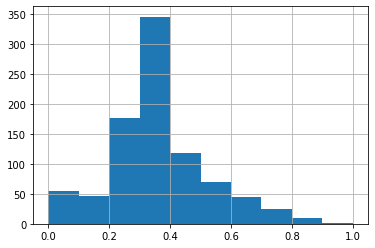

In [ ]:
df.Age_normalized.hist()

In [ ]:
#standard

#Age normalize 시키기 
#최소값을 0, 최대값을 1로 하는 것 
#Normalization
print(df.Age.max())
print(df.Age.min())
max = df.Age.max()
min = df.Age.min()
mean = df.Age.mean()
std = df.Age.std()
df['Age_standardization'] = (df.Age-mean) / std

80.0
0.42


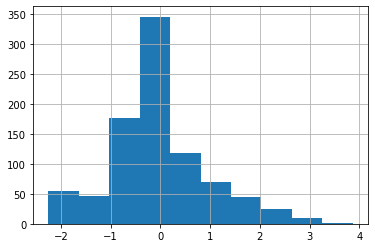

In [ ]:
df.Age_standardization.hist()

### 판다스 - 넘파이 

In [ ]:
df = pd.DataFrame({ 
        "num" : [ 0,1,2,3,4,5,6,7,8,9],
        "name" : ["A", "A", "B", "B", "C", "C", "A", "A", "B", "B"]
     })
# print(df)

df['name_category'] = df['name'].astype('category').cat.codes
df.drop(columns="name", inplace=True)
print(df)

a = df.to_numpy()

print(a)

   num  name_category
0    0              0
1    1              0
2    2              1
3    3              1
4    4              2
5    5              2
6    6              0
7    7              0
8    8              1
9    9              1
[[0 0]
 [1 0]
 [2 1]
 [3 1]
 [4 2]
 [5 2]
 [6 0]
 [7 0]
 [8 1]
 [9 1]]


In [ ]:
df.to_csv('my_data.csv',index = False) #index = False 하면 인덱스 없이 추출 함 
!head my_data.csv

num,name_category
0,0
1,0
2,1
3,1
4,2
5,2
6,0
7,0
8,1


### 엑셀파일

In [ ]:
!wget https://github.com/bharathirajatut/sample-excel-dataset/raw/master/airline.xls

--2021-11-24 05:37:35--  https://github.com/bharathirajatut/sample-excel-dataset/raw/master/airline.xls
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharathirajatut/sample-excel-dataset/master/airline.xls [following]
--2021-11-24 05:37:35--  https://raw.githubusercontent.com/bharathirajatut/sample-excel-dataset/master/airline.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16384 (16K) [application/octet-stream]
Saving to: ‘airline.xls’

airline.xls         100%[===================>]  16.00K  --.-KB/s    in 0s      

2021-11-24 05:37:35 (90.8 MB/s) - ‘airline.xls’ saved [16384/16384]



In [ ]:
#엑셀파일 호출 
df = pd.read_excel('airline.xls')
df.head()

,YEAR,Y,W,R,L,K
0,1948,1.214,0.243,0.1454,1.415,0.612
1,1949,1.354,0.260,0.2181,1.384,0.559
2,1950,1.569,0.278,0.3157,1.388,0.573
3,1951,1.948,0.297,0.3940,1.550,0.564
4,1952,2.265,0.310,0.3559,1.802,0.574


In [ ]:
#엑셀파일 저장 
df.to_excel('my_data.xlsx')

### 타이타닉 전처리 실습 

In [ ]:
# passenger Id : 컬럼 삭제
# Name : 컬럼 삭제
# Sex : Sex_Encoded로 인코딩. male:0, female:1
# Age : 평균으로 결측치 처리. 0~1 normalization
# SibSp : 컬럼 삭제
# Parch : 컬럼 삭제
# Ticket : 컬럼 삭제
# Fare : standardization
# Cabin : 컬럼 삭제 
# Embarked : 결측치 데이터 삭제. Embarked_Encoded로 인코딩, c : 0, S : 1

In [ ]:
df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 컬럼삭제 : passenger, Name, SibSp, Parch, Ticken, Cabin 
df.drop(columns = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],inplace = True)

In [ ]:
# Sex : Sex_Encoded로 인코딩. male:0, female:1
category_map ={'male':0,'female':1}
df['Sex_code'] = df['Sex'].map(category_map)

In [ ]:
# Age : 평균으로 결측치 처리. 0~1 normalization
df.loc[df.Age.isnull(),'Age'] = df.Age[df.Age.notnull()].mean()
max = df.Age.max()
min = df.Age.min()
df['Age_normalized'] = (df.Age-min) / (max-min)
print(df)

     PassengerId  Survived  Pclass  ... Cabin Embarked  Age_normalized
0              1         0       3  ...   NaN        S        0.271174
1              2         1       1  ...   C85        C        0.472229
2              3         1       3  ...   NaN        S        0.321438
3              4         1       1  ...  C123        S        0.434531
4              5         0       3  ...   NaN        S        0.434531
..           ...       ...     ...  ...   ...      ...             ...
886          887         0       2  ...   NaN        S        0.334004
887          888         1       1  ...   B42        S        0.233476
888          889         0       3  ...   NaN        S        0.367921
889          890         1       1  ...  C148        C        0.321438
890          891         0       3  ...   NaN        Q        0.396833

[891 rows x 13 columns]


In [ ]:
#Fare : 150 넘는 것은 150으로 치환 후 standardization 
df.loc[df.Fare > 150,'Fare'] = 150
mean = df.Fare.mean()
std = df.Fare.std()
df['Age_standardization'] = (df.Age-mean) / std
print(df)

     Survived  Pclass  ... Age_standardization  Embarked_Encoded
0           0       3  ...           -0.209441                 1
1           1       1  ...            0.260190                 0
2           1       3  ...           -0.092033                 1
3           1       1  ...            0.172135                 1
4           0       3  ...            0.172135                 1
..        ...     ...  ...                 ...               ...
886         0       2  ...           -0.062681                 1
887         1       1  ...           -0.297497                 1
888         0       3  ...            0.016543                 1
889         1       1  ...           -0.092033                 0
890         0       3  ...            0.084079                 2

[889 rows x 9 columns]


In [ ]:
# Embarked : 결측치 데이터 삭제. Embarked_Encoded로 인코딩, c : 0, S : 1
#df.dropna()
df.drop(df.loc[df.Embarked.isnull()].index,inplace = True)
df.isnull().sum()
#Embarked_Encoded로 카테고리화 (인코딩) 
category_map = {'C':0,'S':1,'Q':2}
df['Embarked_Encoded'] = df['Embarked'].map(category_map)
print(df)

In [ ]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_normalized,Age_standardization,Embarked_Encoded,Sex_code
0,0,3,male,22.000000,7.2500,S,0.271174,-0.209441,1,0
1,1,1,female,38.000000,71.2833,C,0.472229,0.260190,0,1
2,1,3,female,26.000000,7.9250,S,0.321438,-0.092033,1,1
3,1,1,female,35.000000,53.1000,S,0.434531,0.172135,1,1
4,0,3,male,35.000000,8.0500,S,0.434531,0.172135,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0.334004,-0.062681,1,0
887,1,1,female,19.000000,30.0000,S,0.233476,-0.297497,1,1
888,0,3,female,29.699118,23.4500,S,0.367921,0.016543,1,1
889,1,1,male,26.000000,30.0000,C,0.321438,-0.092033,0,0


#### 선생님 답안 

In [ ]:
df = pd.read_csv("titanic.csv")

# 불필요 컬럼 삭제
df.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], 
        inplace=True)

# Sex 컬럼 인코딩
sex_category_map = { "male":0, "female":1 }
df['Sex_Code'] = df['Sex'].map(sex_category_map)

# Age 컬럼 결측치 처리
age_mean = df.loc[df.Age.notnull()].Age.mean()
df.loc[df.Age.isnull(), "Age"] = age_mean

# Embarked 결측치 데이터 삭제
df.dropna(inplace=True)

# Embarked 컬럼 인코딩
embarked_category_map = { "C":0, "S":1, "Q":2 }
df['Embarked_Code'] = df['Embarked'].map(embarked_category_map)

# Age 컬럼 normalization
df['Age_Normalized'] = ( df.Age - df.Age.min()) / ( df.Age.max() - df.Age.min())

# Fare 컬럼 150 넘는 값 150으로 처리
FARE_MAX = 150
df['Fare_Limited'] = df.Fare
df.loc[df.Fare_Limited > FARE_MAX, 'Fare_Limited'] = FARE_MAX

# Fare_Limited 컬럼 standardication
df.Fare_Limited = ( df.Fare_Limited - df.Fare_Limited.mean() ) / df.Fare_Limited.std()

# 원 컬럼 삭제
df.drop(columns=["Sex", "Age", "Fare", "Embarked"], inplace=True)
df.head()

